In [96]:
import pandas as pd
leak_location_data = pd.read_csv('leak_locations_and_rate.csv')

In [97]:
# SUCCESS, ABLE TO RETRIEVE ALL ROWS WITH FUGITIVE
my_value = "Fugitive"
results = leak_location_data.loc[leak_location_data["EmissionCategory"] == my_value]
results.describe()

,EventID,NumberSourcesLeaking,Latitude,Longitude,Duration,LeakRate,tStart,tEnd
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,6.100000e+01,6.100000e+01
mean,49.032787,2.245902,40.595805,-105.139778,1681.983607,55.338510,1.681809e+09,1.681811e+09
std,12.128434,0.623317,0.000124,0.000364,1369.646092,20.943607,2.561132e+04,2.556986e+04
min,31.000000,1.000000,40.595615,-105.140350,899.000000,24.248856,1.681776e+09,1.681777e+09
25%,38.000000,2.000000,40.595665,-105.140270,900.000000,36.636270,1.681784e+09,1.681785e+09
50%,46.000000,2.000000,40.595830,-105.139824,901.000000,56.364502,1.681801e+09,1.681802e+09
75%,60.000000,3.000000,40.595924,-105.139420,2700.000000,65.485450,1.681838e+09,1.681838e+09
max,67.000000,3.000000,40.595943,-105.139390,7200.000000,98.832370,1.681853e+09,1.681854e+09


In [98]:
durations = results.loc[:,"Duration"]
leakRates = results.loc[:, "LeakRate"]
magnitudes = durations * leakRates

In [99]:
df1 = pd.DataFrame(results, columns=['LeakPointId', 'Longitude', 'Latitude', 'Duration', 'LeakRate'])
df1['Magnitudes'] = df1['Duration'] * df1['LeakRate']
df1.describe()
df1

,LeakPointId,Longitude,Latitude,Duration,LeakRate,Magnitudes
0,4T-3`1`,-105.139824,40.595830,900,36.636270,32972.643000
1,5S-26,-105.139390,40.595924,900,64.621765,58159.588500
2,4W-27,-105.140270,40.595936,2700,55.385376,149540.515200
3,4S-43,-105.140350,40.595642,2700,24.345577,65733.057900
4,4T-31,-105.139824,40.595830,1800,36.636270,65945.286000
...,...,...,...,...,...,...
75,5S-26,-105.139390,40.595924,2701,65.485450,176876.200450
94,4S-21,-105.140270,40.595665,899,33.108730,29764.748270
95,4T-11,-105.139890,40.595750,899,65.216900,58629.993100
96,5W-13,-105.139420,40.595615,899,85.664505,77012.389995


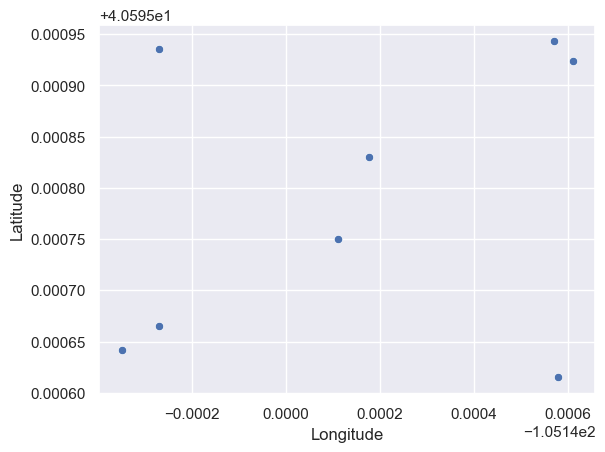

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
graph1 = sns.scatterplot(data=df1, x="Longitude", y="Latitude")
# Note, some of the events have the same longitude and latitude coordinates. So within the 61 different, some stack on each other

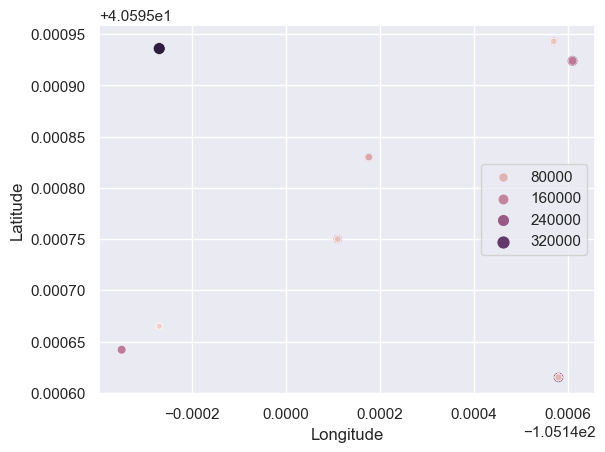

In [101]:
graph2 = sns.scatterplot(data=df1, x="Longitude", y="Latitude", hue=magnitudes, size=magnitudes)

In [102]:
df1 = pd.DataFrame(results, columns=['LeakPointId', 'Longitude', 'Latitude', 'Duration', 'LeakRate'])
df1['Magnitudes'] = df1['Duration'] * df1['LeakRate']
df1.describe()
df1

,LeakPointId,Longitude,Latitude,Duration,LeakRate,Magnitudes
0,4T-3`1`,-105.139824,40.595830,900,36.636270,32972.643000
1,5S-26,-105.139390,40.595924,900,64.621765,58159.588500
2,4W-27,-105.140270,40.595936,2700,55.385376,149540.515200
3,4S-43,-105.140350,40.595642,2700,24.345577,65733.057900
4,4T-31,-105.139824,40.595830,1800,36.636270,65945.286000
...,...,...,...,...,...,...
75,5S-26,-105.139390,40.595924,2701,65.485450,176876.200450
94,4S-21,-105.140270,40.595665,899,33.108730,29764.748270
95,4T-11,-105.139890,40.595750,899,65.216900,58629.993100
96,5W-13,-105.139420,40.595615,899,85.664505,77012.389995


In [103]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import HoverTool

TOOLTIPS = HoverTool(tooltips=[
  ("LeakPointId", "@LeakPointId"),
  ("(Longitude, Latitude)", "(@Longitude, @Latitude)"),
])

# set output to static HTML file
output_file(filename="custom_filename.html", title="Static HTML file")

p = figure(title="Fugitive Cases", x_axis_label='Longitude', y_axis_label='Latitude', width=1000, height=600, tools=[TOOLTIPS])
p.circle('Longitude', 'Latitude', size=10, source=df1)
show(p)
